# 1. Supervised Learning (지도학습)
## 1.1 Decision Tree(결정 트리)
* 분할과 가지치기 과정을 반복하면서 모델을 생성한다.
* 결정트리에는 분류와 회귀 모두에 사용할 수 있다.
* 여러개의 모델을 함께 사용하는 앙상블 모델이 존재한다. (RandomForest, GradientBoosting, XGBoost)
* 각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.
* 시계열 데이터와 같이 범위 밖의 포인트는 예측 할 수 없다.
* 과대적합되는 경향이 있다. 이는 본문에 소개할 가지치기 기법을 사용해도 크게 개선되지 않는다.

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.3076923076923077, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.75, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.5833333333333334, 'petal length (cm) <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.4166666666666667, 'sepal width (cm) <= 2.6\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2

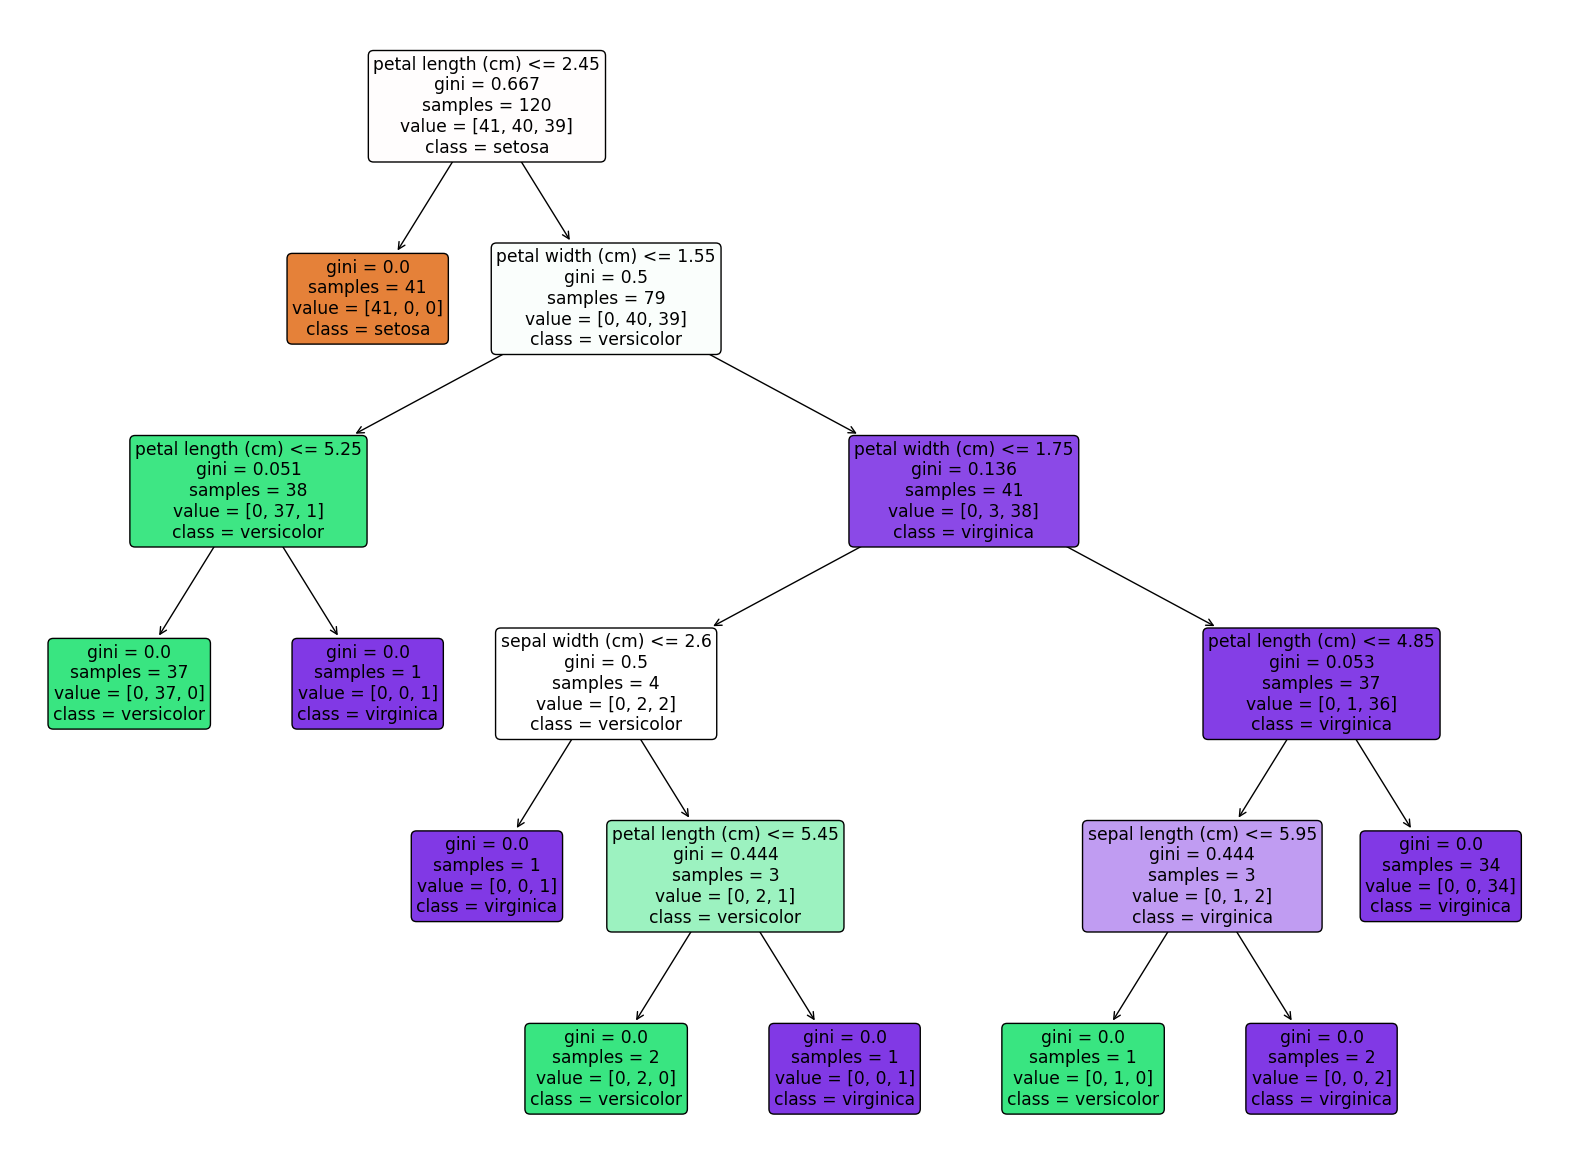

In [24]:
# 결정트리 규칙을 시각화
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(20,15) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

위에서 만든 결정트리는 학습 데이터에 완전 적합(과적합)되어 있다. 따라서 다른 데이터엔 적절하게 사용될 수 없을 것이다.
따라서 적절히 가치지기를 수행한다.

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

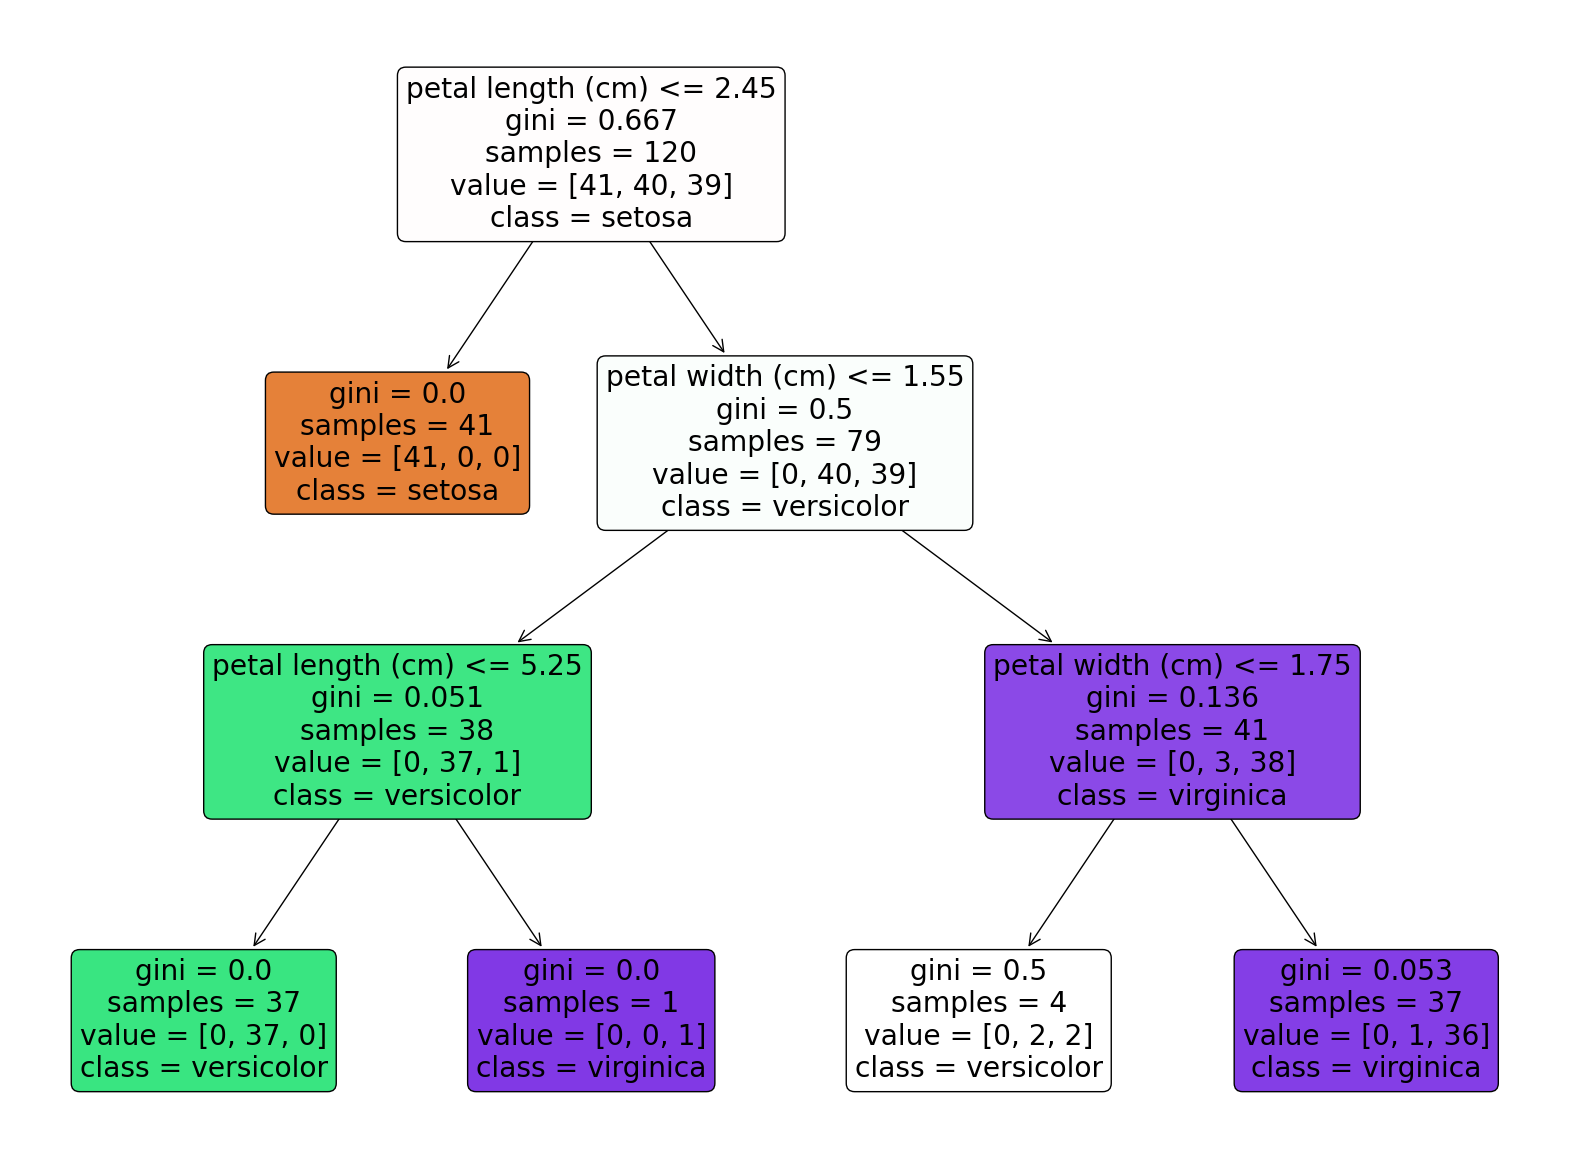

In [25]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 결정트리 규칙 시각화
plt.figure( figsize=(20,15) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True,
               rounded=True)

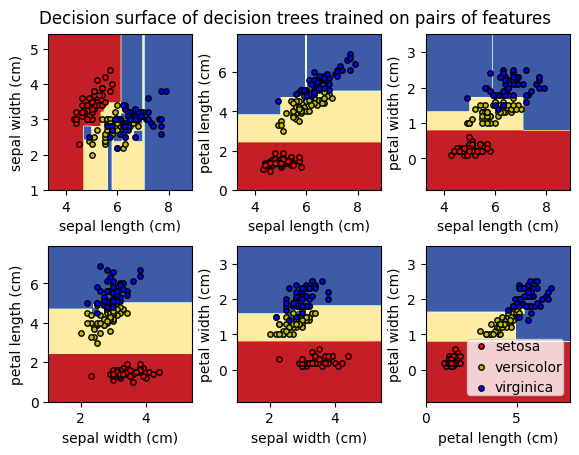

In [26]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    # iris 데이터의 4개의 특징 중 1개를 x 축 나머지를 y축으로 설정
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

## 1.2. RandomForestClassifier (랜덤 포레스트 분류)

기계 학습에서의 랜덤 포레스트(영어: random forest)는 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)를 출력함으로써 동작한다.

출처 : <a href="https://ko.wikipedia.org/wiki/랜덤_포레스트"> 랜덤 포레스트 </a>

* 결정트리는 해당 데이터에 대해 맞춰서 분류를 진행한 것이기 때문에 과적합 현상이 자주 나타났다.
* 그에 따라 이를 개선하기 위해 2001년 앙상블 기법으로 고안된 것이 랜덤 포레스트이다.
* 훈련 과정에서 구성한 다수의 결정 트리들을 랜덤하게 학습시켜 분류 또는 회귀의 결과도출에 사용된다. 즉, 특정 특성을 선택하는 트리를 여러개 생성하여 이들을 기반으로 작업을 수행하는 것이다.
* 각각의 트리가 독립적으로 학습하기 때문에 학습과정을 병렬화할 수 있다.
* 일반적인 의사결정트리는 Tree Correlation이라고 하는 특정 feature 하나가 정답에 많은 영향을 주게되면 대부분의 결과치가 유사하게 나타나는 문제점이 있었다.
* 하지만 랜덤 포레스트에서는 그러한 문제를 해결했고, 파라미터의 개수가 적어 튜닝도 쉽다.
* 타깃 예측을 잘하며 각각이 구별되는 여러개의 트리를 만들기 위해 무작위성이 부여된다.
* 대표적인 '배깅' 모델이다. (cf. 배깅(Bagging)은 bootstrap aggregating의 줄임말이다.)
* 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
* 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
* 트리 개수가 많아질 수록 시간이 더 오래 걸린다.

모델 내부에 트리를 만들기 위해 데이터에 대한 부트스트랩 샘플들을 생성한다. 부트스트랩 샘플이란 중복을 허용한 샘플로서, 데이터에서 부트스트랩 샘플이 생성된다. (ex. [‘a’, ‘b’, ‘c’, ‘d’]에서 부트스트랩 샘플을 만든다고 하면 [‘b’, ‘d’, ‘d’, ‘c’] , [‘d’, ‘a’, ‘d’, ‘a’], [‘a’, ‘a’, ‘c’, ‘b’] 등이 생성된다.)
생성 데이터 샘플을 기반으로 트리들을 생성한다. 몇 의 특성을 고를지(max_features), 몇 의 트리를 만들지(n_estimators) 등을 파라미터로 받아 이를 기반으로 생성된다.
이렇게 생성된 모든 트리를 기반으로 예측이 수행된다. 회귀의 경우 모든 예측을 평균하여 결과를 도출하고, 분류는 soft voting 방식을 응용해 사용한다.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

* make_moons 데이터로부터 데이터를 받고 이를 학습데이터와 테스트데이터로 분류
* 모델을 생성하고 위의 학습데이터를 학습(fit)
* 이렇게 학습 후 생성된 랜덤포레스트 내부 트리는 estimator_ 속성에 저장되어 있다.

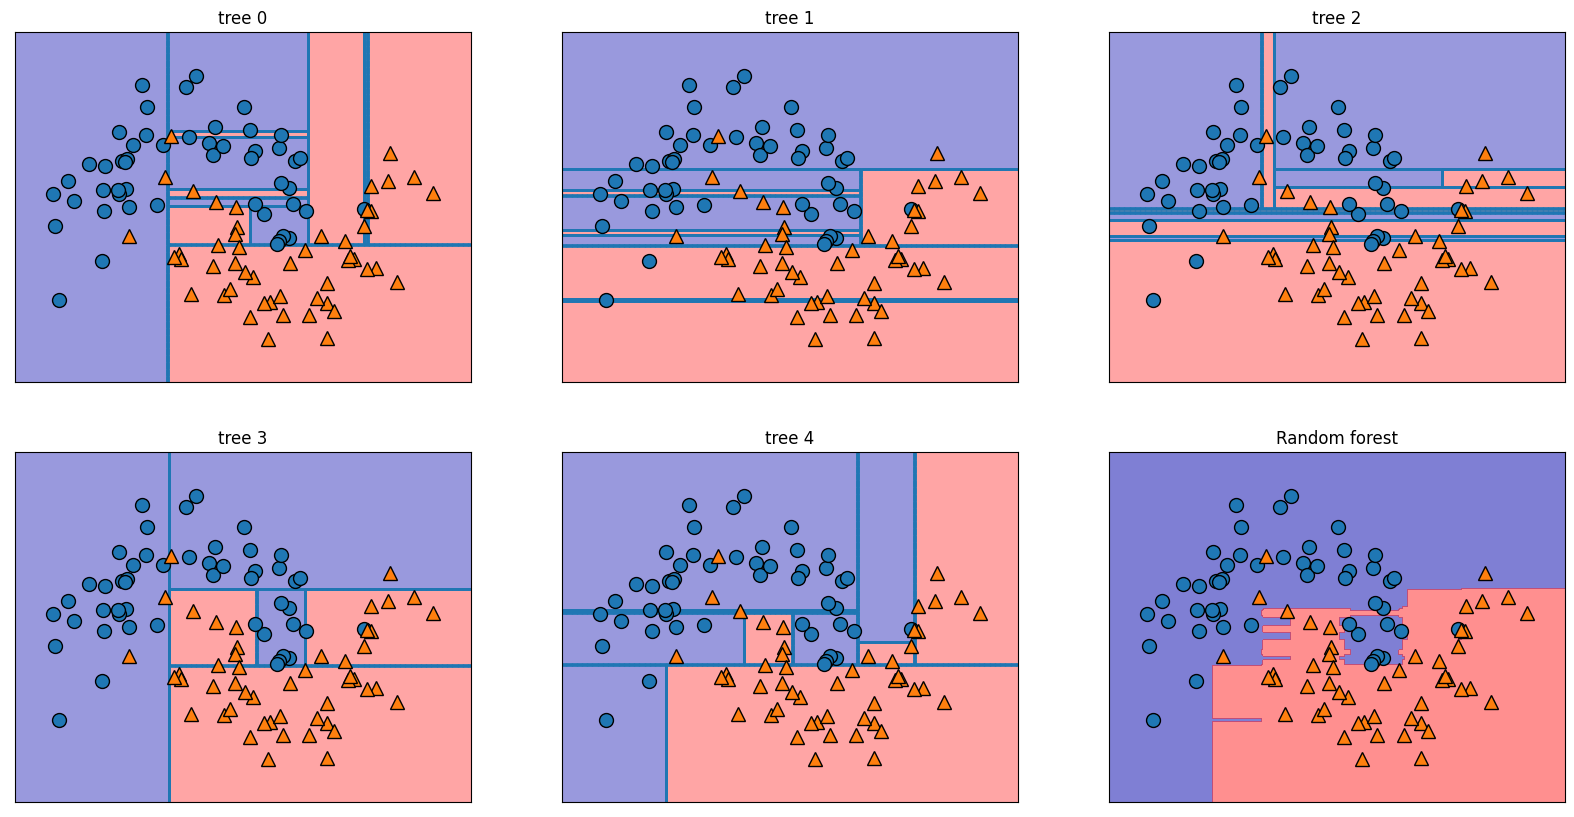

In [28]:
import matplotlib.pyplot as plt
import mglearn

# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
fig, axes = plt.subplots(2, 3, figsize=(20,10) )
for i, (ax, tree) in enumerate( zip( axes.ravel(), model.estimators_ ) ):
    ax.set_title("tree {}".format(i) )
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 랜덤포레스트로 만들어진 결정경계
axes[-1, -1].set_title("Random forest")
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.5, ax=axes[-1,-1] )
mglearn.discrete_scatter(X[:,0], X[:,1], y)

## 1.3. AdaBoost
Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함
<img src="https://miro.medium.com/proxy/1*m2UHkzWWJ0kfQyL5tBFNsQ.png">

1. 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류

2. 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)

3. 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류

4. 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)

5. 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음

6. 마지막으로 분류기들을 결합하여 최종 예측 수행

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.8800


DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.82
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9866666666666667


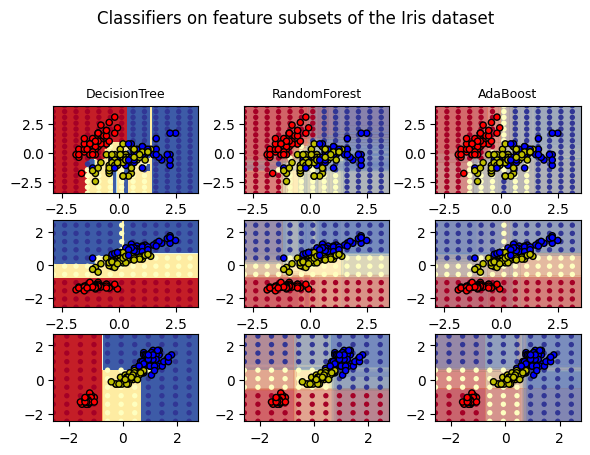

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## 1.4 LinearRegression

### 통계학에서 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀(simple linear regression), 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.[참고 1] (출처 : <a href="https://ko.wikipedia.org/wiki/선형_회귀"> 선형회귀 </a>)
<img src="https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png">

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


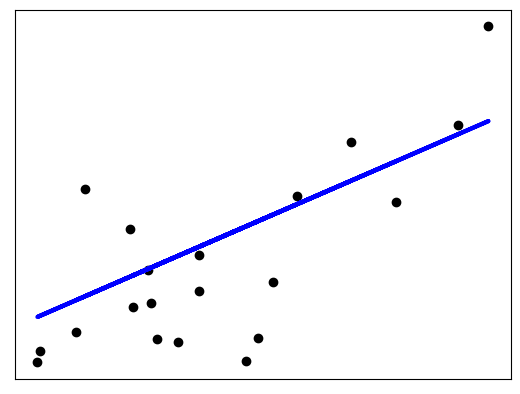

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 1.5 Logisitc Regression 
<img src="https://heung-bae-lee.github.io/image/logistic_regression.png">

유방암 데이터 (악성 또는 양성)
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html"> scikit-learn 유방암 데이터 </a>

In [2]:

# # importing required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the breast cancer dataset
X,y = load_breast_cancer(return_X_y = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test,y_pred)
print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')

accuracy score: 0.9736842105263158
classifcation report : 
                precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 2. Unsupervised Learning (비지도학습)
## 2.1 Kmean 알고리즘
k-평균 알고리즘(K-means clustering algorithm)은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다. 이 알고리즘은 자율 학습의 일종으로, 레이블이 달려 있지 않은 입력 데이터에 레이블을 달아주는 역할을 수행한다. 이 알고리즘은 EM 알고리즘을 이용한 클러스터링과 비슷한 구조를 가지고 있다. (출처 : <a href="https://ko.wikipedia.org/wiki/K-평균_알고리즘"> kmean </a>)


<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png">

In [44]:
import numpy  as np
customer = np.loadtxt('Mall_Customers_noname.csv',delimiter=',')
# customer[:,0]= CustomerID
# customer[:,1]= Gender	
# customer[:,2]=Age	
# customer[:,3]=Annual Income (k$)
# customer[:,4]=Spending Score (1-100)

In [128]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상 Annual Income (k$) ,Spending Score (1-100)
data = customer[:,[3, 4]]
data

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

파이썬 K-means 군집화 결과 시각화 (K=3)

0 2
1 3
2 4
3 5


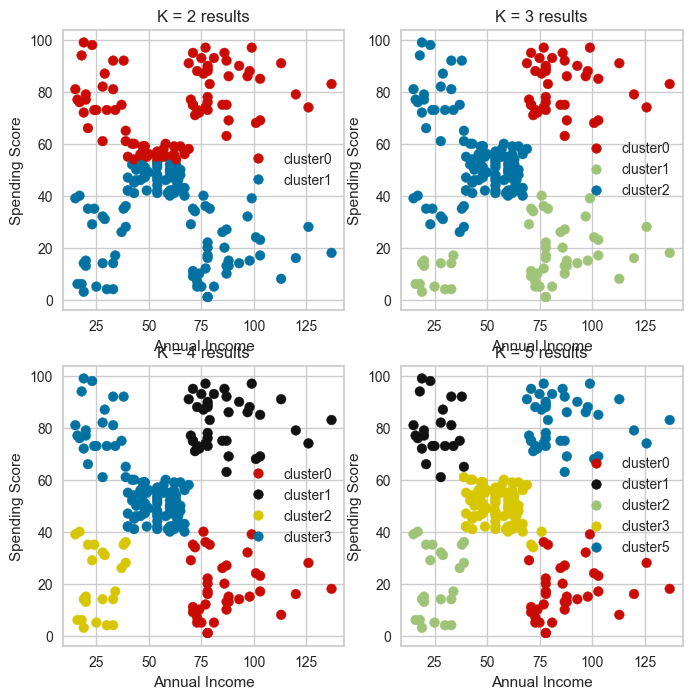

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = [2,3,4,5]
plt.figure(figsize = (8, 8))
for idx in range(len(k)):
    print(idx,k[idx])
    # 그룹 수, random_state 설정
    model = KMeans(n_clusters = k[idx], random_state = 10)

    # 정규화된 데이터에 학습
    model.fit(data_scale)

    # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
    customer_ = model.fit_predict(data_scale)

    
    plt.subplot(2, 2, idx+1)
    color_list = ListedColormap(['r','k','g','y','b'])
    legend_list = [ 'cluster0','cluster1','cluster2','cluster3','cluster5'] 
    
    scatter=plt.scatter(customer[:,3],customer[:,4], c=customer_, cmap=color_list)
    plt.legend(handles=scatter.legend_elements()[0],labels=legend_list)
    plt.title('K = %d results'%k[idx] )
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
plt.show()    

데이터의 분포를 고려하였을 때, k = 5인 경우가 가장 클러스터링이 가장 잘 된 경우라고 볼 수있음

In [116]:
# !pip3 install yellowbrick  설치 되지 않았을 경우

### K-means 클러스터링 k 결정(Elbow Method)
위에서는 시각화 결과로 k = 5일 때, 가장 군집화가 깔끔하게 되었다 생각했는데,
더 객관적인 k 결정 방법인 Elbow Method를 구현하기
아래 결과에서 <font color="blue">파란색</font>이 각 데이터들의 군집 중심과의 평균 거리
<font color="green">초록색</font>은 학습 시간을 나타낸다고 합니다.

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10))

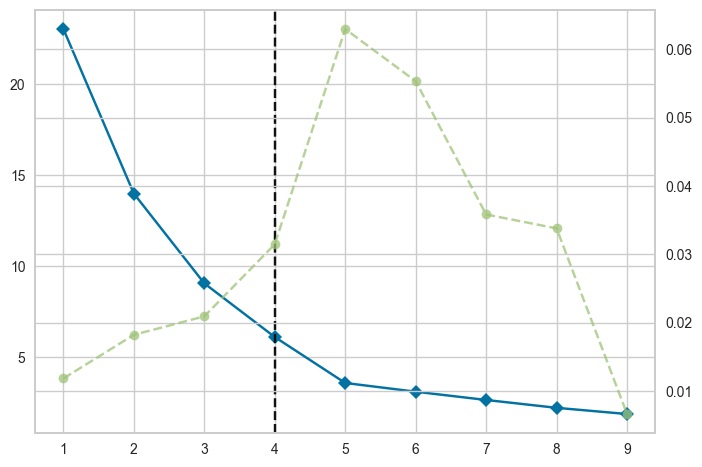

In [115]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

### 2.2  Nearest Neighbors  (최근접 이웃 탐색)

최근접 이웃 탐색(영어: nearest neighbor search)은 가장 가까운 (또는 가장 근접한) 점을 찾기 위한 최적화 문제이다. 근접 탐색(proximity search), 유사도 탐색(similarity search), 최근접 점쌍 문제(closest point search)라고도 불린다. 근사(近似)라는 개념은 보편적으로 물체와 물체가 덜 유사할수록 그 함수의 값은 커지는 상이(相異) 함수에 의해서 표현된다. 엄밀하게, 최근접 이웃 탐색 문제는 다음과 같이 정의된다: 공간 M에서의 점들로 이루어진 집합 S 가 주어졌을 때, 쿼리점 q ∈ M에 대해 S 안에서 가장 q와 가까운 점을 찾는다. 도널드 커누스는 그의 저서 《컴퓨터 프로그래밍의 예술》(1973) 제 3권에서 사람들의 거주지를 가장 가까운 우체국에 배정하는 프로그램이라는 의미에서 이를 우체국 문제라고 명명했다. 이 문제의 직접적인 일반화 문제로써는, k 개의 가장 가까운 점을 찾는 K-최근접 이웃 알고리즘이 있다.(출처 : <a href="https://ko.wikipedia.org/wiki/최근접_이웃_탐색">최근접 이웃 탐색 </a>)
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/K-nearest-neighbor_Verfahren.png">

In [166]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

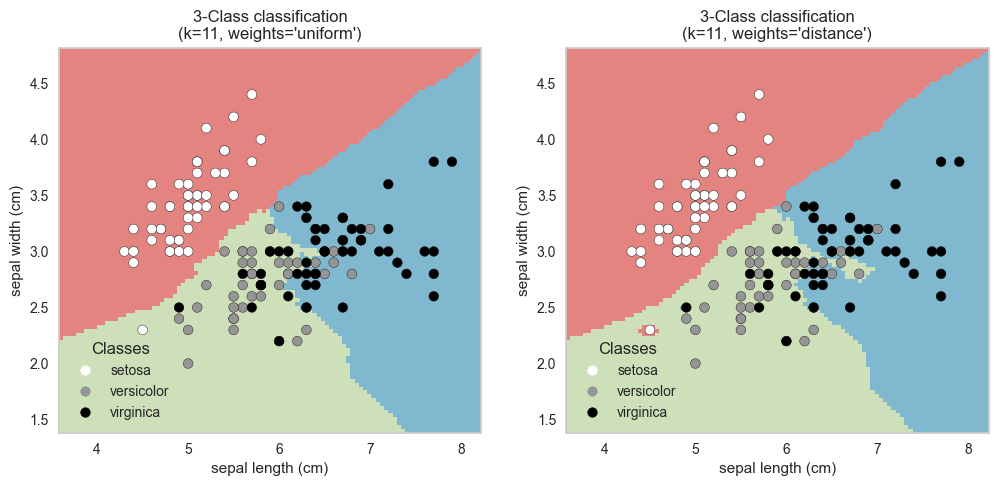

In [167]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
        cmap=color_list
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

중치가 “유니폼”인 경우 가장 가까운 모든 이웃이 결정에 동일한 영향을 미칩니다. 반면, 가중치=“거리”인 경우 각 이웃에 부여되는 가중치는 해당 이웃에서 쿼리 지점까지의 거리의 반수에 비례

### 2.3 계층적 군집 분석 Dendrogram
덴드로그램(Dendrogram)은 나무를 나타내는 다이어그램이다. 이 도식적 표현은 다양한 상황에서 자주 사용된다.

계층적 군집화에서는 해당 분석에 의해 생성된 클러스터의 배열을 보여준다.[2]
계산생물학에서는 때로는 히트맵의 가장자리에 유전자나 샘플의 클러스터링을 보여준다.[3]
계통학에서는 다양한 생물학적 분류군 간의 진화적 관계를 보여준다. 이 경우 덴드로그램을 계통수라고도 한다.[4]
'덴드로그램'이라는 이름은 "나무"를 의미하는 두 개의 고대 그리스 단어 δένδρον(déndron)와 "그림, 수학적 수치"를 의미하는 γράμμα(grámma)에서 유래되었다.[5][6] (출처 : <a href="https://ko.wikipedia.org/wiki/덴드로그램"> DBSCAN </a>)
<img src="https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f/dendrogram-design/cluster-dendrogram.png">

덴드로그램의 장점은 클러스터의 개수를 지정하지 않아도 된다는 점이다. 결과를 보고, 덴드로그램을 잘라서(첫 번째 이미지에서 그래프를 점선으로 자르는 행위) 원하는 수준의 군집을 나눌 수 있다.

덴드로그램은 생물학의 분류나 고객군의 분류에서 많이 사용한다.


출처 : https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f/dendrogram-design/cluster-dendrogram.png 

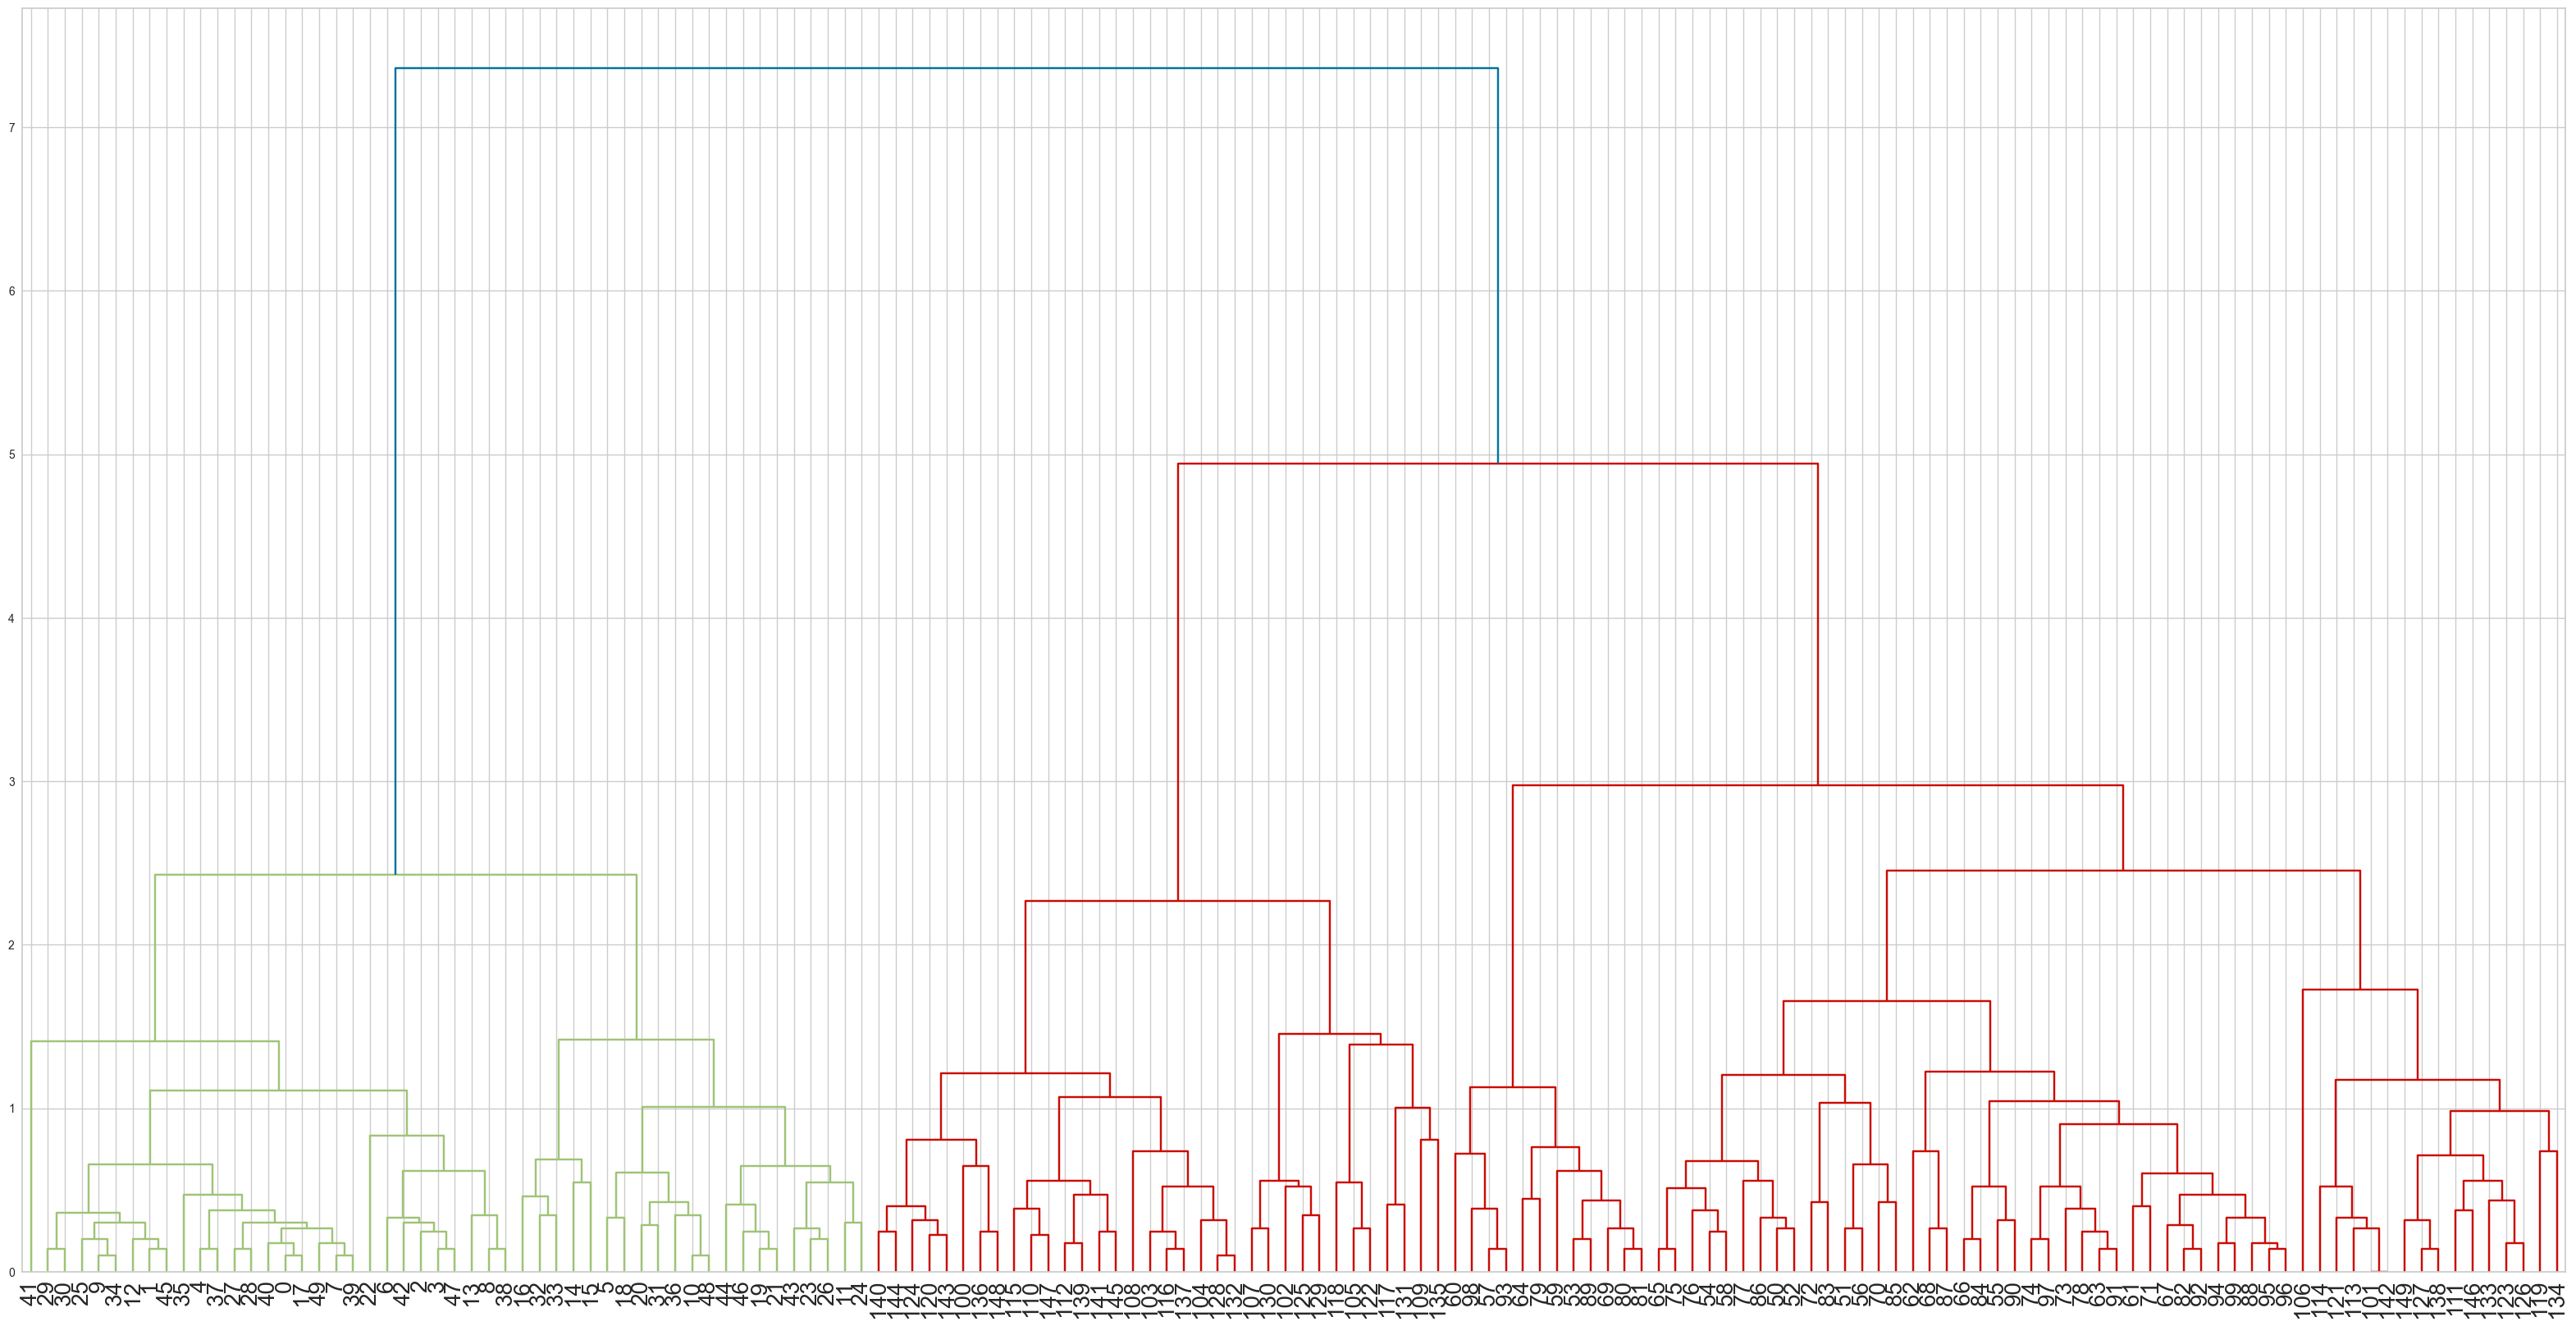

In [180]:
from sklearn import datasets
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,leaf_rotation=90,leaf_font_size=20,
)
plt.show()


덴드로그램에서 관심있는 것은 하나의 데이터 포인트와 군집과의 거리 또는 군집과 군집간의 거리이다.

* **최단연결법과 최장연결법**

최단연결법은 두 개의 군집에서 가장 가까운 데이터 포인트끼리의 거리를 구하는 방식이다.
<img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-33.png">

최장연결법은 그 반대다. 두 개의 군집 내에 있는 모든 데이터 포인트끼리 쌍을 지어 그 거리가 가장 먼 데이터 포인트를 구한다.
<img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-34.png">

* **평균연결법**

평균연결법은 두 개의 군집 내 데이터 포인트 쌍의 거리를 평균낸다. 최단연결법과 최장연결법의 트레이드 오프적인 관계를 중화하나 계산 비용이 높다는 단점이 있다. 
<img src="https://lucy-the-marketer.kr/wp-content/uploads/2020/10/image-35.png">

계층적 클러스터링의 최대 문제점은 greedy algorithm이라는 점이다. 한 번 병합이 되거나 분리된 군집은 다시 되돌릴 수 없다
